# Set Up Environment

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd

# Load the Dataset and look at it

In [ ]:
data = pd.read_csv('Dec_Users.csv')
print(data.shape)
data.head()

# Remove outliers and values that do not make sense

In [3]:
data2 = data.loc[data.stream_requests.values< 600, ['stream_requests', 'stream_playing_time_combined']]
data2 = data2.loc[data2.stream_playing_time_combined.values>0]
data2 = data2.loc[data2.stream_playing_time_combined.values<360000]
data2.head()

,stream_requests,stream_playing_time_combined
0,1,1.180
1,7,8178.172
2,61,59304.408
3,16,18512.761
4,5,6598.268


In [6]:
from math import exp

# Create two new columns of exp(-requests) and exp(-consumption) and add them to the dataset

In [31]:
data2['st_rq_st'] = np.exp(-data2.stream_requests)
data2['st_pl_st'] = np.exp(-data2.stream_playing_time_combined/3600)

In [32]:
data2.head()

,stream_requests,stream_playing_time_combined,st_rq_st,st_pl_st
0,1,1.180,3.678794e-01,9.996723e-01
1,7,8178.172,9.118820e-04,1.031352e-01
2,61,59304.408,3.221340e-27,7.009274e-08
3,16,18512.761,1.125352e-07,5.843452e-03
4,5,6598.268,6.737947e-03,1.599567e-01


# Plot the data

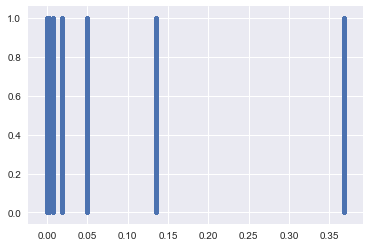

In [34]:
plt.scatter(data2['st_rq_st'], data2['st_pl_st'], s=10);

why does the plot look like this after the transformation? Is this correct?

In [35]:
data2.head()

,stream_requests,stream_playing_time_combined,st_rq_st,st_pl_st
0,1,1.180,3.678794e-01,9.996723e-01
1,7,8178.172,9.118820e-04,1.031352e-01
2,61,59304.408,3.221340e-27,7.009274e-08
3,16,18512.761,1.125352e-07,5.843452e-03
4,5,6598.268,6.737947e-03,1.599567e-01


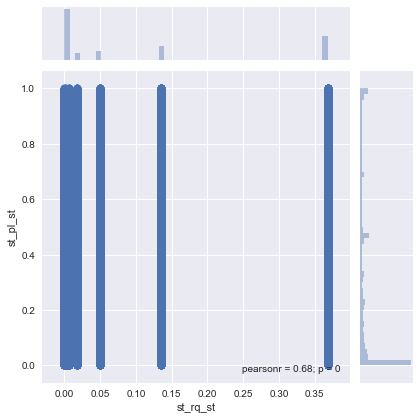

In [36]:
sns.jointplot(x='st_rq_st',y='st_pl_st',data=data2,kind='scatter')

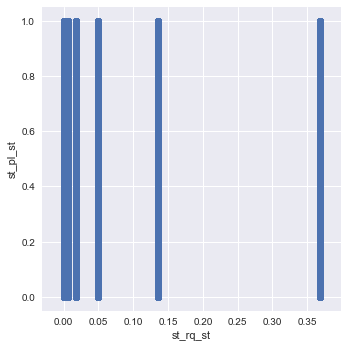

In [37]:
sns.lmplot("st_rq_st", "st_pl_st", data=data2, fit_reg=False)

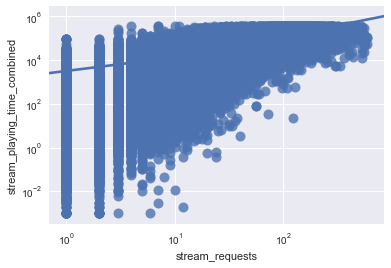

In [40]:
# Initialize figure and ax
fig, ax = plt.subplots()

# Set the scale of the x-and y-axes
ax.set(xscale="log", yscale="log")

# Create a regplot
sns.regplot("stream_requests", "stream_playing_time_combined", data2, ax=ax, scatter_kws={"s": 100})

# Show plot
plt.show()

In [41]:
del data2['st_rq_st']
del data2['st_pl_st']

In [42]:
data2.head()

,stream_requests,stream_playing_time_combined
0,1,1.180
1,7,8178.172
2,61,59304.408
3,16,18512.761
4,5,6598.268


In [44]:
data2['st_rq_log'] = np.log10(data2.stream_requests)
data2['st_pl_log'] = np.log10(data2.stream_playing_time_combined)

In [45]:
data2.head()

,stream_requests,stream_playing_time_combined,st_rq_log,st_pl_log
0,1,1.180,0.000000,0.071882
1,7,8178.172,0.845098,3.912656
2,61,59304.408,1.785330,4.773087
3,16,18512.761,1.204120,4.267471
4,5,6598.268,0.698970,3.819430


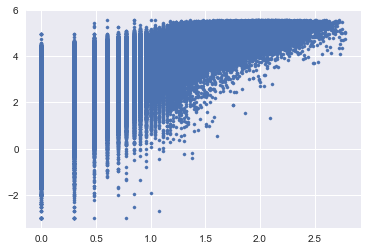

In [46]:
plt.scatter(data2['st_rq_log'], data2['st_pl_log'], s=10);

In [54]:
del data2['stream_requests']
del data2['stream_playing_time_combined']

KeyError: 'stream_requests'

In [55]:
data2.head()

,st_rq_log,st_pl_log
0,0.000000,0.071882
1,0.845098,3.912656
2,1.785330,4.773087
3,1.204120,4.267471
4,0.698970,3.819430


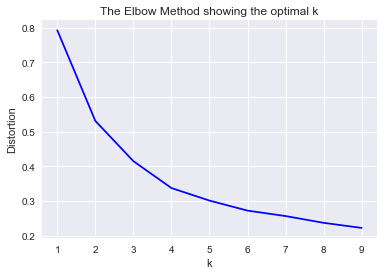

In [56]:
# clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data2)
    kmeanModel.fit(data2)
    distortions.append(sum(np.min(cdist(data2, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data2.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [90]:
del data2['id']
del data2['Cluster']

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)
kmeans.fit(data2)
y_kmeans = kmeans.predict(data2)

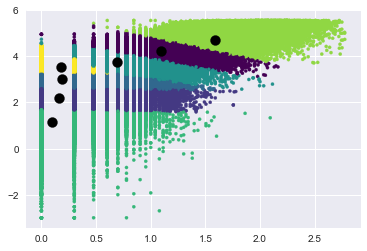

In [91]:
plt.scatter(data2['st_rq_log'], data2['st_pl_log'], c=y_kmeans, s=10, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100)

In [92]:
data2['Cluster'] = y_kmeans
data2['id']=data.registered_user_id
data2.head()

,st_rq_log,st_pl_log,Cluster,id
0,0.000000,0.071882,4,204e1465-4a3b-4fe4-9a33-741e67120cae
1,0.845098,3.912656,3,e86b7599-fc07-49a7-a56d-f2dd8299585b
2,1.785330,4.773087,5,9f8f102a-d5a5-4f3a-8dde-5575e0cbe3f9
3,1.204120,4.267471,0,bd443f09-4fe0-42a8-88c2-5447f009f3df
4,0.698970,3.819430,3,e0375d89-d0dc-404a-aab4-4b50e20e35b5


In [93]:
aa= pd.DataFrame=data2.groupby('Cluster').id.nunique().reset_index()

In [94]:
aa.head(7)

,Cluster,id
0,0,650674
1,1,178687
2,2,421160
3,3,754166
4,4,104904
5,5,393223
6,6,639573


In [95]:
data2.groupby('Cluster').st_rq_log.sum()

Cluster
0    712218.116424
1     29480.587440
2     80956.478532
3    521178.736906
4      9949.026873
5    624119.072081
6    116427.768349
Name: st_rq_log, dtype: float64

In [96]:
data2.groupby('Cluster').st_pl_log.sum()

Cluster
0    2.758356e+06
1    3.903253e+05
2    1.262237e+06
3    2.847161e+06
4    1.221345e+05
5    1.859106e+06
6    2.251512e+06
Name: st_pl_log, dtype: float64

In [102]:
from functools import reduce
nums = data2.groupby('Cluster').st_rq_log
nums_product = reduce((lambda x, y:x*y), nums)
print(nums_product)

TypeError: can't multiply sequence by non-int of type 'tuple'

In [1]:
data.sum()

NameError: name 'data' is not defined